In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [108]:

qbb_spp = pd.read_pickle("../../QBBData/Data_PhipSeq_BWH/merge_800_10Feb2020/species_score.pkl",compression='gzip')
virCut = pd.read_csv("../../QbbBMI_Project/curatedData/VirscanThreshold_3Feb2020.csv").set_index('Species')
qbbmData = pd.read_pickle("../../QBBData/MetaData/QBB_GAIBNE_16032020_cluster.pkl")#.set_index('PROJECT_DUMMY_ID')
qbbPval = pd.read_pickle("../../QBBData/Data_PhipSeq_BWH/merge_800_10Feb2020/pval_peptide_Agg.pkl",compression='gzip')

In [109]:
qbbBead = qbbPval[qbbPval.columns[qbbPval.columns.str.contains('Bead|bead')]]

In [116]:
qbbPval_nb = qbbPval.drop(qbbBead[qbbBead[qbbBead>=2.3].fillna(0).astype(bool).sum(axis=1)>=2].index)

In [117]:
virMdata = pd.read_pickle("../../virViz3/datasets/vir3_metaSubset.pkl").set_index("id")

In [118]:
alerData= pd.read_pickle("../curtaedAllergenData/AllergenType_QBB.pkl")
alerData

,fx1,fx2,fx22,fx5,gx2,phad,t20,wx1
QBB_DUMMY_ID,,,,,,,,
SIR000037000780,0.004688,0.030764,0.158547,0.040405,0.061567,0.182508,0.029467,0.142290
SIR000037000142,0.000000,0.070241,0.129783,0.089441,0.063238,0.320504,0.016894,0.205851
SIR000037000275,0.355763,1.596741,0.403655,0.533030,0.283591,1.395833,0.129739,0.503114
SIR000037000009,0.038830,0.000000,0.147813,0.122652,0.094520,0.209529,0.000000,0.155590
SIR000037000702,0.068248,0.000000,0.166260,0.134755,0.073208,1.589408,0.391426,0.457234
...,...,...,...,...,...,...,...,...
SIR000037000061,0.047589,4.065160,0.269296,0.441743,0.240977,3.636251,0.259336,0.986090
SIR000037000281,0.010382,0.044473,0.191027,0.174846,0.213236,0.278512,0.010518,0.231748
SIR000037000282,0.010833,0.000000,0.173047,0.041801,0.081115,0.213718,0.003010,0.157595


In [119]:
qbbIds = set(qbbmData.index).intersection(set(qbbPval.columns)).intersection(alerData.index)
print (len(qbbIds))
qbbPval = qbbPval_nb[qbbIds]
qbb_spp = qbb_spp[qbbIds]
alerData = alerData.loc[qbbIds]


795


In [96]:
# threshold for clinically allergy ornot
clinicalThreshold= 0.3
alerData_norm = alerData/clinicalThreshold
alerData_norm[alerData_norm>=1].fillna(0).astype(bool).sum(axis=0)

fx1      35
fx2     158
fx22     65
fx5     100
gx2     102
phad    399
t20      77
wx1     211
dtype: int64

<AxesSubplot:>

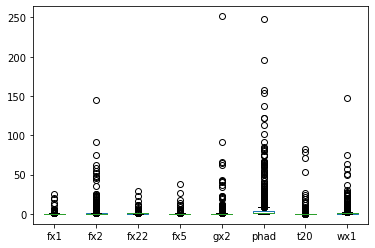

In [142]:
alerData_norm.plot(kind='box')

<AxesSubplot:>

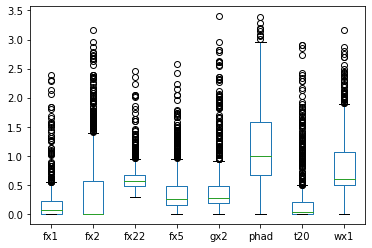

In [143]:
alerData_norm[alerData_norm>1] = 1+np.log10(alerData_norm[alerData_norm>1])
alerData_norm.plot(kind='box')

<AxesSubplot:xlabel='AllergenTest', ylabel='normScore'>

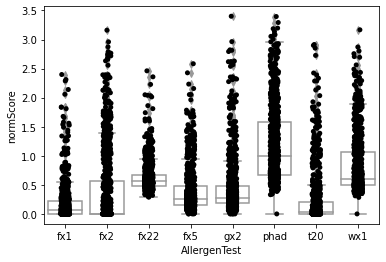

In [150]:
alerData_norm_x=alerData_norm.unstack().reset_index().rename({'level_0':'AllergenTest',0:'normScore'},axis=1)
sns.boxplot(x='AllergenTest',y='normScore',data= alerData_norm_x,color='white')
sns.stripplot(x='AllergenTest',y='normScore',data= alerData_norm_x,color='k')

In [19]:
qbbPval.shape

(115753, 795)

In [10]:
virMdata[virMdata['Protein.names'].str.contains("purothion")]

,Aclstr50,Bclstr50,Entry,goId,Organism,Protein.names,Sequence,Species,Subcellular.location,end,oligo,source,start,peptide
id,,,,,,,,,,,,,,
125802,NaN,NaN,Q9T0P1,GO:0006952,Triticum aestivum (Wheat),Alpha purothionin (Uncharacterized protein),MGSKGFKGVIVCLLILGLVLEQLQVEGKSCCRSTLGRNCYNLCRAR...,Triticum aestivum (Wheat),NaN,56,GGAATTCCGCTGCGTATGGGTTCAAAGGGGTTTAAGGGTGTCATTG...,IEDB,1,MGSKGFKGVIVCLLILGLVLEQLQVEGKSCCRSTLGRNCYNLCRAR...
125803,NaN,NaN,Q9T0P1,GO:0006952,Triticum aestivum (Wheat),Alpha purothionin (Uncharacterized protein),SCCRSTLGRNCYNLCRARGAQKLCAGVCRCKISSGLSCPKGFPKLA...,Triticum aestivum (Wheat),NaN,84,GGAATTCCGCTGCGTTCATGTTGCCGTTCAACACTTGGGCGTAACT...,IEDB,29,SCCRSTLGRNCYNLCRARGAQKLCAGVCRCKISSGLSCPKGFPKLA...
125804,NaN,NaN,Q9T0P1,GO:0006952,Triticum aestivum (Wheat),Alpha purothionin (Uncharacterized protein),RCKISSGLSCPKGFPKLALESNSDEPDTIEYCNLGCRSSVCDYMVN...,Triticum aestivum (Wheat),NaN,112,GGAATTCCGCTGCGTCGTTGCAAAATCTCTAGTGGGCTCAGTTGTC...,IEDB,57,RCKISSGLSCPKGFPKLALESNSDEPDTIEYCNLGCRSSVCDYMVN...
125805,NaN,NaN,Q9T0P1,GO:0006952,Triticum aestivum (Wheat),Alpha purothionin (Uncharacterized protein),IEYCNLGCRSSVCDYMVNAAADDEEMKLYVENCADACVSFCNGDAG...,Triticum aestivum (Wheat),NaN,137,GGAATTCCGCTGCGTATTGAATATTGTAACCTGGGTTGCCGTTCGT...,IEDB,85,IEYCNLGCRSSVCDYMVNAAADDEEMKLYVENCADACVSFCNGDAG...


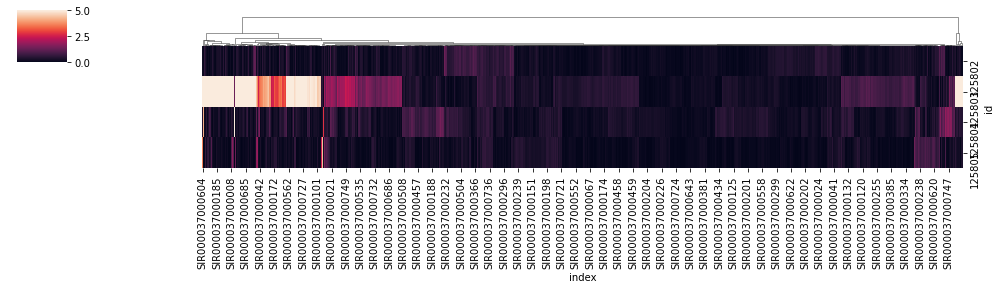

In [139]:
sns.clustermap(qbbPval.loc[virMdata[virMdata['Protein.names'].str.contains("purothion")].index],vmin=0,vmax=5,figsize=(14,4),row_cluster=False)

In [122]:
qbbPval.shape

(114526, 795)

In [120]:
purothionRes = qbbPval.loc[virMdata[virMdata['Protein.names'].str.contains("purothion")].index]

In [121]:
purothionRes_norm = purothionRes/2.3
purothionRes_norm[purothionRes_norm>=1].fillna(0).astype(bool).sum(axis=1)

id
125802      0
125803    134
125804      3
125805      3
dtype: int64

In [123]:
virMdata[virMdata['Species'] == "Triticum aestivum (Wheat)"].groupby(['Protein.names']).size()

Protein.names
Alpha purothionin (Uncharacterized protein)                                                                                                                                                                                4
Alpha/beta gliadin (Fragment)                                                                                                                                                                                             10
Gamma-gliadin                                                                                                                                                                                                             11
Gliadin/avenin-like seed protein (Uncharacterized protein)                                                                                                                                                                 7
Glutenin, high molecular weight subunit DX5                                                           

In [125]:
virMdata.loc[qbbPval_nb.index]

(126982, 14)

In [124]:
wheatRes = qbbPval.loc[virMdata[virMdata['Species'] == "Triticum aestivum (Wheat)"].index]
wheatRes_norm = wheatRes/2.3
wheatRes_norm_at3 = wheatRes_norm.loc[wheatRes_norm[wheatRes_norm>=1].fillna(0).astype(bool).sum(axis=1)>=3]

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([125853, 125854, 125855], dtype='int64', name='id'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

<AxesSubplot:ylabel='Frequency'>

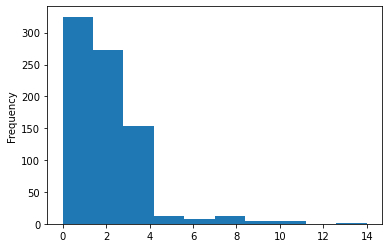

In [56]:
wheatRes_norm_at3[wheatRes_norm_at3>=1].fillna(0).astype(bool).sum().plot(kind='hist')

In [71]:
w_a4 = wheatRes_norm_at3.columns[wheatRes_norm_at3[wheatRes_norm_at3>=1].fillna(0).astype(bool).sum()>=5]
print (w_a4.shape)

(44,)


In [105]:
qbbBead[qbbBead.loc[wheatRes_norm_at3.index]>=2.3].fillna(0).astype(bool).sum(axis=1)

id
1         0
2         0
3         0
4         0
5         0
         ..
128283    0
128284    0
128285    0
128286    0
128287    0
Length: 115753, dtype: int64

<AxesSubplot:>

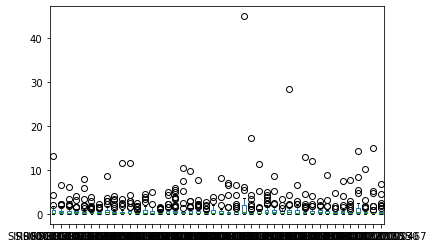

In [172]:
wheatRes_normx = wheatRes_norm_at3[w_a4]
wheatRes_normx.plot(kind='box')

<ipython-input-173-59c8376d7064>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wheatRes_normx[wheatRes_normx>=1] = 1+np.log10(wheatRes_normx[wheatRes_normx>=1])
/Users/tkhan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3089: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


<AxesSubplot:>

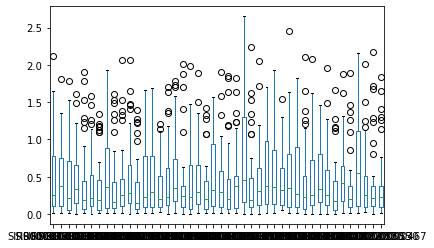

In [173]:
wheatRes_normx[wheatRes_normx>=1] = 1+np.log10(wheatRes_normx[wheatRes_normx>=1])
wheatRes_normx.plot(kind='box')

In [174]:
corrX = pd.concat([alerData_norm.loc[w_a4],wheatRes_normx[w_a4].T],axis=1).corr()

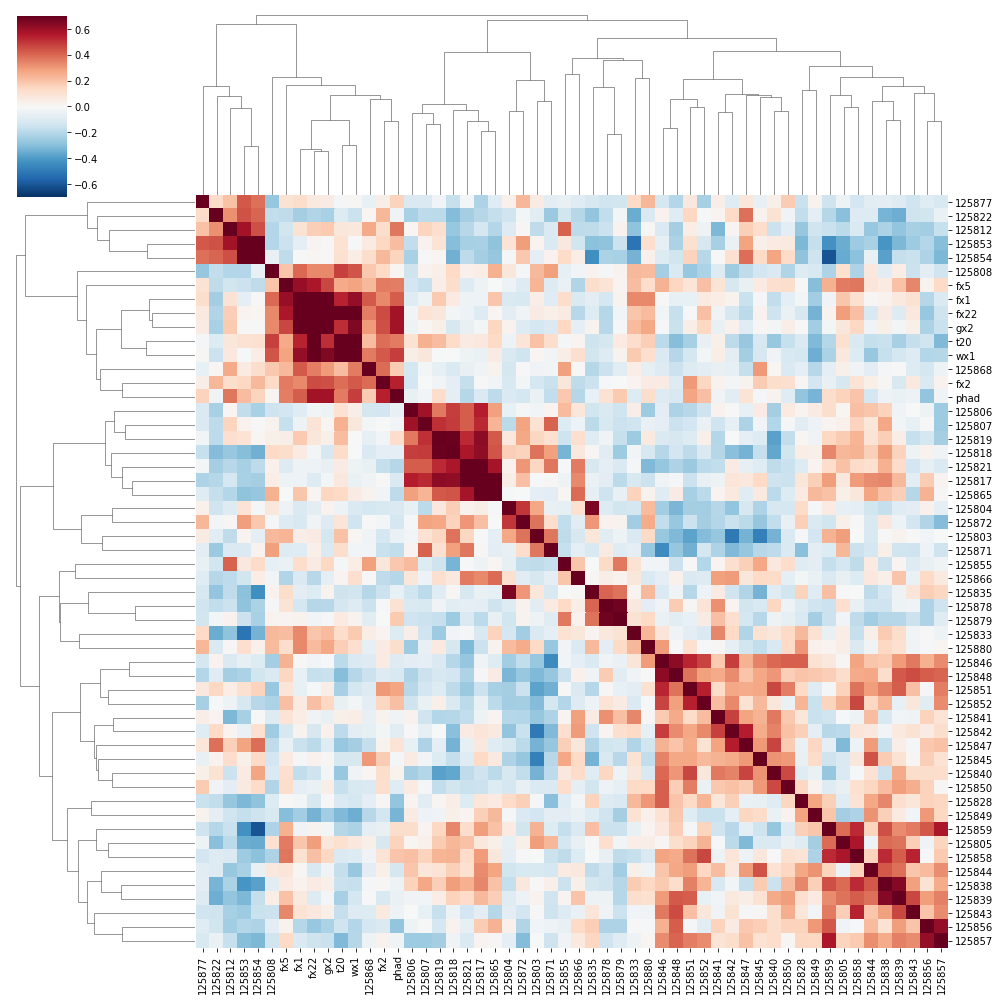

In [175]:
sns.clustermap(corrX,vmin=-.7,vmax=.7,cmap='RdBu_r',figsize=(14,14))

In [179]:
corrX.columns[corrX.fx1>0.2].drop(['fx1',  'fx2', 'fx22',  'fx5',  'gx2', 'phad',  't20',  'wx1'])

Index([125808, 125833, 125868, 125880], dtype='object')

In [177]:
virMdata.loc[[125812,
       125851,125852, 125853, 125858]][['Entry','start','end','Species','Protein.names','peptide']]

,Entry,start,end,Species,Protein.names,peptide
id,,,,,,
125812,D2T2K3,169,224,Triticum aestivum (Wheat),Alpha/beta gliadin (Fragment),HAIILHHQQQQQQQQQQQQQQQQQQQQQQQQQQQQPSSQVSYQQPQ...
125851,P10388,477,532,Triticum aestivum (Wheat),"Glutenin, high molecular weight subunit DX5",GQQPGQGQQGQQPGQGQPGYYPTSPQQSGQGQQPGQWQQPGQGQPG...
125852,P10388,505,560,Triticum aestivum (Wheat),"Glutenin, high molecular weight subunit DX5",GQGQQPGQWQQPGQGQPGYYPTSPLQPGQGQPGYDPTSPQQPGQGQ...
125853,P10388,533,588,Triticum aestivum (Wheat),"Glutenin, high molecular weight subunit DX5",QGQPGYDPTSPQQPGQGQQPGQLQQPAQGQQGQQLAQGQQGQQPAQ...
125858,P10388,673,728,Triticum aestivum (Wheat),"Glutenin, high molecular weight subunit DX5",QQPGQWQQPGQGQPGYYLTSPLQLGQGQQGYYPTSLQQPGQGQQPG...


In [238]:
virMdata.loc[corrX.columns[corrX.fx5>0.1].drop(['fx1',  'fx2', 'fx22',  'fx5',  'gx2', 'phad',  't20',  'wx1'])][['Entry','start','end','Species','Protein.names','peptide']]

,Entry,start,end,Species,Protein.names,peptide
id,,,,,,
125803,Q9T0P1,29,84,Triticum aestivum (Wheat),Alpha purothionin (Uncharacterized protein),SCCRSTLGRNCYNLCRARGAQKLCAGVCRCKISSGLSCPKGFPKLA...
125805,Q9T0P1,85,137,Triticum aestivum (Wheat),Alpha purothionin (Uncharacterized protein),IEYCNLGCRSSVCDYMVNAAADDEEMKLYVENCADACVSFCNGDAG...
125808,D2T2K3,57,112,Triticum aestivum (Wheat),Alpha/beta gliadin (Fragment),FLPQLPYPQPQPFPPQQSYPQPQPQYPQPQQPISQQQAQLQQQQQQ...
125818,P08453,57,112,Triticum aestivum (Wheat),Gamma-gliadin,QTFPHQPQQQVPQPQQPQQPFLQPQQPFPQQPQQPFPQTQQPQQPF...
125833,D2KFG9,169,201,Triticum aestivum (Wheat),Gliadin/avenin-like seed protein (Uncharacteri...,IQTIPAMCDVHVPPYCYTTISPSSDVTTDMGGY
125835,P10388,29,84,Triticum aestivum (Wheat),"Glutenin, high molecular weight subunit DX5",LQCERELQELQERELKACQQVMDQQLRDISPECHPVVVSPVAGQYE...
125839,P10388,141,196,Triticum aestivum (Wheat),"Glutenin, high molecular weight subunit DX5",GQGQQGYYPTSPQQPGQWQQPEQGQPRYYPTSPQQSGQLQQPAQGQ...
125840,P10388,169,224,Triticum aestivum (Wheat),"Glutenin, high molecular weight subunit DX5",YPTSPQQSGQLQQPAQGQQPGQGQQGQQPGQGQPGYYPTSSQLQPG...
125843,P10388,253,308,Triticum aestivum (Wheat),"Glutenin, high molecular weight subunit DX5",GQGQQPGQGQQGQQLGQGQQGYYPTSLQQSGQGQPGYYPTSLQQLG...


In [221]:
#IEDB Peptides
virMdata_iedb = virMdata[virMdata['source'] == "IEDB"]
iedbRes = qbbPval.loc[set(qbbPval.index).intersection(set(virMdata_iedb.index))]
iedbRes_norm = iedbRes/2.3
iedbRes_norm_at3 = iedbRes_norm.loc[iedbRes_norm[iedbRes_norm>=1].fillna(0).astype(bool).sum(axis=1)>=7]
print (iedbRes_norm_at3.shape)

(1252, 795)


<AxesSubplot:>

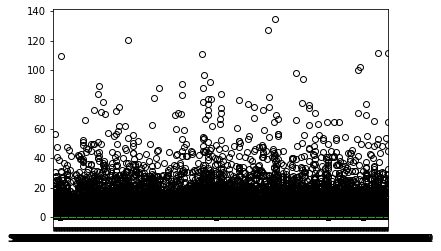

In [222]:
iedbRes_norm_at3.plot(kind='box')

<ipython-input-223-a6f6c83ba9c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iedbRes_norm_at3[iedbRes_norm_at3>1]=1+np.log10(iedbRes_norm_at3[iedbRes_norm_at3>1])
/Users/tkhan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3089: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)


<AxesSubplot:>

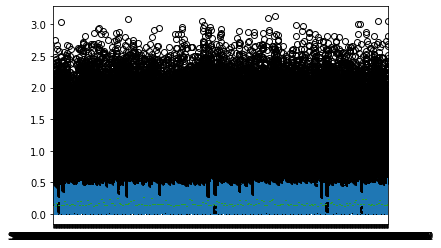

In [223]:
iedbRes_norm_at3[iedbRes_norm_at3>1]=1+np.log10(iedbRes_norm_at3[iedbRes_norm_at3>1])
iedbRes_norm_at3.plot(kind='box')

In [224]:
X = iedbRes_norm_at3.T.fillna(0).values
y = alerData_norm.loc[iedbRes_norm_at3.T.index].phad
print (X.shape, y.shape)

(795, 1252) (795,)


In [208]:
import statsmodels.api as sm

In [226]:
model = sm.OLS(y,X)
results = model.fit()
tdata = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]

/Users/tkhan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/tkhan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/tkhan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


In [228]:
tdata

,coef,std err,t,P>|t|,[0.025,0.975]
x1,0.1656,inf,0,NaN,NaN,NaN
x2,-0.0187,inf,0,NaN,NaN,NaN
x3,0.1118,inf,0,NaN,NaN,NaN
x4,0.1284,inf,0,NaN,NaN,NaN
x5,-0.0668,inf,0,NaN,NaN,NaN
...,...,...,...,...,...,...
x1248,-0.0179,inf,0,NaN,NaN,NaN
x1249,-0.0900,inf,0,NaN,NaN,NaN
x1250,0.0416,inf,0,NaN,NaN,NaN
x1251,0.0875,inf,0,NaN,NaN,NaN


In [213]:
tdata[abs(tdata.coef)>0.3]

,coef,std err,z,P>|z|,[0.025,0.975]
x53,0.3497,0.169,2.064,0.039,0.018,0.682
x96,-0.3163,0.124,-2.550,0.011,-0.559,-0.073


In [230]:
from sklearn.decomposition import PCA

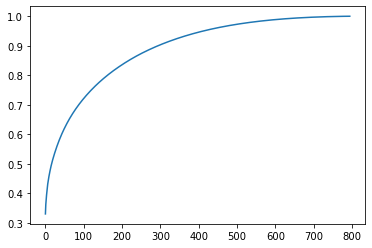

In [236]:
pca = PCA()
proj = pca.fit(iedbRes_norm_at3.fillna(0).values)
plt.plot(np.cumsum(proj.explained_variance_ratio_))

In [ ]:
np.cos